In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = open('../data/cleaned_poems_lines.txt',  encoding="utf-8").read()

# Lowercase and split the text
corpus = data.split("\n")

# Preview the result
print(corpus)
print(len(corpus))

['መዘንጋት ባለበት በታናሽ ሕሊና', 'መዘመር ልጀምር ለድንግል ምስጋና', 'እኔስ በውዳሴሽ ባሕር እዋኛለሁ', 'ገናንነትሽን ክብርሽን እያሰብኩ', 'የትህትናሽ ነገር ቢወሳ አያልቅም', 'ታነቢያለሽና ለዚህ ክፉ አለም', 'ድንግል ሆይ ለኃጥአን ታስቢያለሽና', 'ልቦናዬ ባንቺ በምልጃሽ ተፅናና', 'ማርያም ሆይ ስለዚህ እንወድሻለን', 'አንቺን ተማፅነናል እንድታማልጂን', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ስለበደለኞች ሊያቀርቡ ልመና', 'እሳትአውያኑ ሱራፌል ኪሩቤል', 'ሊነኩት ያልቻሉት የእሳቱን ነበልባል', 'አንቺ ግን ታቀፍሽው ሳምሽው በከንፈርሽ', 'ከፍጥረት ለይቶ ፍፁም ስላፀናሽ', 'ማርያም ሆይ ስለዚህ እንወድሻለን', 'አንቺን ተማፅነናል', 'ዘወትር እጆችሽ ተዘርግተዋልና', 'ስለበደለኞች ሊያቀርቡ ልመና', 'መድኃኔዓለም የለም የሚሳነው', 'አማኑኤል የለም የሚሳነው', 'እርሱ ቃል ሲናገር ተራራው ሜዳ ነው', 'መድኃኔዓለም የለም የሚሳነው', 'አላስብም አልፈዋለሁ ብዬ', 'ጉንጭ አልፎ ትራሴን እያጠበ እንባዬን', 'እየተፈጸመ ኃይሉ በድካሜ', 'ማእበሉን አለፍኩኝ ቀለለልኝ ሸክሜ', 'የቤቴ እራስ ነው የእቅዴ መሪ', 'በክፉም በደጉም ነፍሴን አስተማሪ', 'ፈጥሮ የማይረሳኝ ቤዛዬ ደረሰ', 'ቤቴን ደስታ ሞላው እንባዬ ታበሰ', 'ትናንት ባዶ ነበር የለኝ የሚሰፈር', 'አንዳች አልነበረኝ የሚታይ የሚቆጠር', 'ከርሱ የተነሳ ዛሬ ግን ሙሉ ነኝ', 'ክብር ለእርሱ ይሁን አለ የማይተወኝ', 'እየከለከለ ለእኔ ማይጠቅመኝን', 'በጊዜ እየሰጠ ደግሞ የሚረባኝን', 'ሁሉ በእርሱ ሆኗል አልሆነም ያለ እርሱ', 'ውዳሴ ምስጋና ይድረስ ለንጉሱ', 'እግዚአብሔርን አመስግኑት', 'ሥራህ ግሩም ድንቅ ነው በሉት', 'ሰማይን ያለምሰሶ', 'ምድርንም ያለ መሠረት', 'ያጸና

In [3]:
# Initialize the vectorization layer
vectorize_layer = tf.keras.layers.TextVectorization()

# Build the vocabulary
vectorize_layer.adapt(corpus)

In [4]:
# Get the vocabulary and its size
vocabulary = vectorize_layer.get_vocabulary()
vocab_size = len(vocabulary)

print(f'{vocabulary}')
print(f'{vocab_size}')

['', '[UNK]', 'ነው', 'ላይ', 'እንደ', 'ወደ', 'ግን', 'ጌታ', 'እኔ', 'አምላክ', 'ምን', 'ሁሉ', 'ብሎ', 'ሰው', 'ሆይ', 'ነበር', 'ድንግል', 'አለ', 'እንዴት', 'ስለ', 'ጊዜ', 'ክርስቶስ', 'አንተ', 'እያለ', 'እግዚአብሔር', 'ነኝ', 'ሁሉን', 'ፍቅር', 'አንድ', 'ዛሬ', 'ቃል', 'ጋር', 'ይኸው', 'ልጅ', 'ነገር', 'ሆኖ', 'ዛሬም', 'እኛ', 'ደስ', 'እውነት', 'ሁሉም', 'ዘመን', 'ክብር', 'ኢየሱስ', 'አዳም', 'እሱ', 'አንቺ', 'አባት', 'አለኝ', 'ቤት', 'ያለ', 'ከቶ', 'እንኳን', 'ቅዱስ', 'ሳለ', 'ማን', 'ማነው', 'መስቀል', 'ለምን', 'ደም', 'እናት', 'እባክህ', 'እርሱ', 'ናት', 'በጣም', 'ስቡህ', 'መች', 'ይቅር', 'የሰው', 'ዝም', 'እስከ', 'ነበረ', 'በመስቀል', 'ቀን', 'መቼ', 'ጊዮርጊስ', 'ደስታ', 'ይህን', 'ይህ', 'ያለው', 'ዓመት', 'እናቴ', 'ብዙ', 'ሰማይ', 'ምንም', 'ማርያም', 'ሆነ', 'ዲያብሎስ', 'ያ', 'ዓለም', 'እኮ', 'እናቱ', 'ተስፋ', 'በፍቅር', 'በአንድ', 'ስሙ', 'ሰዓት', 'ሰዎች', 'መጣ', 'መንፈስ', 'ፍጥረት', 'ዮናስ', 'የዓለም', 'ከላይ', 'እና', 'እሳት', 'አለው', 'አሁን', 'ብዬ', 'ብቻ', 'በሰማይ', 'ሰላም', 'ሞትን', 'ምድር', 'ምስጉን', 'ልጆች', 'ልክ', 'ፈጣሪ', 'ድንቅ', 'ያኔ', 'እጅግ', 'እያሉ', 'እኛን', 'እንዲህ', 'አቤት', 'አባ', 'አምስቱ', 'አምላክን', 'አምላኬ', 'አለም', 'ነሽ', 'ነህ', 'ብለው', 'በእውነት', 'ስር', 'ሞት', 'መከራ', 'ፍሬ', 'ድል', 'ደግሞ', 'ይህንን', 'ይሁን', 'የኔ', 'የለም', 'እኔን', 'አቤቱ

In [5]:
# Initialize the sequences list
input_sequences = []

for line in corpus:
    # Generate the integer sequence of the current line
	sequence = vectorize_layer(line).numpy()

    # Loop over the line several times to generate the subphrases
	for i in range(1, len(sequence)):
        # Generate the subphrase
		n_gram_sequence = sequence[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)


# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [7]:
# Get sample sentence
sentence = corpus[1000].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence:
  token_list.append(vocabulary.index(word))

# Print the token list
print(token_list)

sample sentence: ['የዳንኤል', 'አጽናኝ', 'የአፎምያ', 'ረዳት']
[3088, 1443, 1164, 906]


In [8]:
def sequence_to_text(sequence, vocabulary):
  '''utility to convert integer sequence back to text'''

  # Loop through the integer sequence and look up the word from the vocabulary
  words = [vocabulary[index] for index in sequence]

  # Combine the words into one sentence
  text = tf.strings.reduce_join(words, separator=' ').numpy().decode()

  return text

In [11]:
# Pick element
elem_number = 120

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0 405 214 118]
decoded to text:         ሥራህ ግሩም ድንቅ
one-hot label: [0. 0. 1. ... 0. 0. 0.]
index of label: 2


In [12]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {sequence_to_text(xs[elem_number], vocabulary)}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0 8130 8409]
decoded to text:          መዘመር ልጀምር
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 8647


In [13]:
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 64
# Set the random seed for reproducibility

# Put the inputs and labels to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices((xs,ys))

# Optimize the dataset for training
dataset = dataset.cache().prefetch(PREFETCH_BUFFER_SIZE).batch(BATCH_SIZE)

In [14]:
from tensorflow.keras import regularizers, callbacks

# Parameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.005  # Reduced for more stable training
dropout_rate = 0.3     # Common dropout rate

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(max_sequence_len - 1,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        lstm_units, return_sequences=False, dropout=dropout_rate, recurrent_dropout=0.2
    )),
    tf.keras.layers.Dense(
        vocab_size,
        activation='softmax',
        kernel_regularizer=regularizers.l2(1e-4)
    )
])

In [15]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 11, 100)        │       895,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 300)            │       301,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8950)           │     2,693,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,890,150 (14.84 MB)

 Trainable params: 3,890,150 (14.84 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Early stopping callback
early_stop = callbacks.EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

epochs = 120

# Train the model
history = model.fit(dataset, epochs=epochs, callbacks=[early_stop])

Epoch 1/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 35s 136ms/step - accuracy: 0.0103 - loss: 9.5974
Epoch 2/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.0140 - loss: 8.8793
Epoch 3/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 30s 162ms/step - accuracy: 0.0157 - loss: 8.6231
Epoch 4/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 31s 168ms/step - accuracy: 0.0146 - loss: 8.4395
Epoch 5/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 27s 150ms/step - accuracy: 0.0177 - loss: 8.1098
Epoch 6/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 31s 171ms/step - accuracy: 0.0192 - loss: 7.8421
Epoch 7/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 29s 160ms/step - accuracy: 0.0262 - loss: 7.5674
Epoch 8/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.0319 - loss: 7.4501
Epoch 9/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 38s 211ms/step - accuracy: 0.0380 - loss: 7.2771
Epoch 10/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 38s 207ms/step - accuracy: 0.0436 - loss: 7.3166
Epoch 11/120
182/182 ━━━━━━━━━━━━━━━━━━━━ 37s 202ms/step - accuracy: 0.0467 - loss: 7.2289
Epoch 12

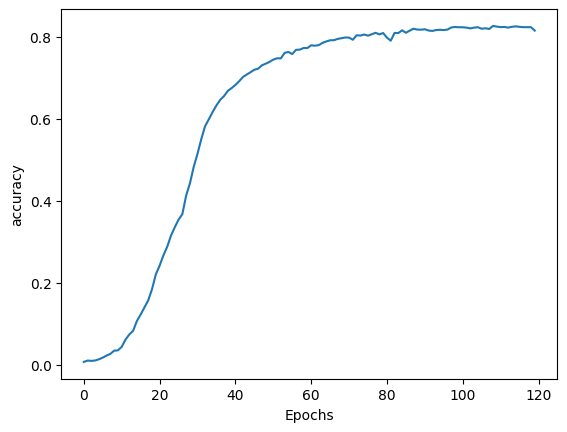

In [17]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [38]:
# Define seed text
seed_text = "ሰላም ዛሬም ምድሪቱን"

# Define total words to predict and line settings
next_words = 50
words_per_line = 3
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)


ሰላም ዛሬም ምድሪቱን ነው እየሆንን ልክ
 የሚያደርገኝ የቅዱሳንአምላክ ያደረከኝ
 የላቸው ግዕዙን ዓለም
 ከሥርዋ እናቱ ግዕዙን
 እጹን የሚያደርገኝ የፀሐይ
 ከሥርዋ ግዕዙን እናቱ
 እናቱ ግዕዙን እያሰብኩ
 እናቱ እንቅልፍ እጹን
 ከሥርዋ እናቱ ከአንበሶች
 እጹን እጹን ሆኖ
 ያስፈታ እናቱ ግዕዙን
 እናቱ ይውላል ከሥርዋ
 የሚያደርገኝ ይውላል ከሥርዋ
 አስገድዶ ነው ወይን
 ግዕዙን እንኳን ይን
 እናቱ እያሰብኩ ከሥርዋ
 ከጠላት እንቅበረው


In [ ]:
# Define seed text
seed_text = "መዘመር ልጀምር"

# Define total words to predict and line settings
next_words = 40
words_per_line = 5
word_count = 0

# Loop until desired length is reached
for _ in range(next_words):

    # Generate the integer sequence of the current line
    sequence = vectorize_layer(seed_text)
    sequence = tf.keras.utils.pad_sequences([sequence], maxlen=max_sequence_len-1, padding='pre')

    # Predict next word
    probabilities = model.predict(sequence, verbose=0)
    predicted = np.argmax(probabilities, axis=-1)[0]

    choice = np.random.choice([1,2,3])

    predicted = np.argsort(probabilities)[0][-choice]
    
    if predicted != 0:
        output_word = vocabulary[predicted]
        seed_text += " " + output_word
        word_count += 1

        # Add a line break every N words
        if word_count % words_per_line == 0:
            seed_text += "\n"

# Print the result
print(seed_text)
